# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

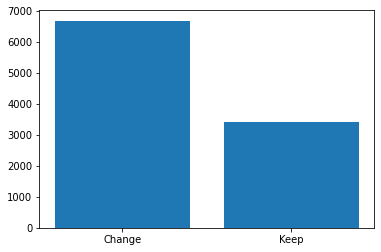

In [ ]:
#Import matplotlib to display visualization
import matplotlib.pyplot as plt
#Import random to use choice() in order to select a random door each time
from random import choice

#Initiate a function that plays one game
def play_one_game(strategy):
#Create a doors variable containing 3 values
  doors = ['A', 'B', 'C']
#This make the correct door a random one between all the values within the variable "doors"
  correct_door = choice(doors)
#This make the first choice random as previously done for the correct door
  first_choice = choice(doors)
#This remove the door randomly picked as first choice from the variable doors
  doors.remove(first_choice)

#True is always true so this while loop will run forever until the break happens
#This loop first choose the hint door randomly and removes the door in case it is not the correct door, then it breaks the loop
  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

#If the strategy is "change", it selects a new door randomly since the first choice has been removed from the list 
#and one of the other door as been removed as the hint door, there is only one door left so it changes the door

#If the strategy is "keep", it does not select a new door, and if the strategy is something else, it raises an error stating the strategy is not recognized

  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")
  
  return second_choice == correct_door

#This function is used to select a strategy and plays it as much as requested depending of the value of the arguments in position "nb_turns"
def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))

#This is the code used to display the visualization
plot = plt.bar([1, 2],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000))], 
               tick_label=["Change", "Keep"])

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**. 

A player following it will alternate **randomly** between "Change" and "Keep".

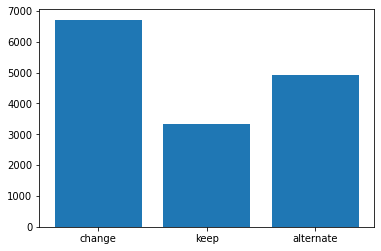

In [ ]:
import matplotlib.pyplot as plt
from random import choice


def play_one_game(strategy):
  var1 = 2
  doors = ['A', 'B', 'C']
  correct_door = choice(doors)
  
  first_choice = choice(doors)
  doors.remove(first_choice)

  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break
      
  if strategy == "alternate":
    strategy = choice(["change", "keep"])
  if strategy == "change":
      second_choice = choice(doors)
  elif strategy == "keep":
      second_choice = first_choice

      
  else:
      raise ValueError("Strategy not recognized!")
  
  return second_choice == correct_door


def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))


plot = plt.bar([1, 2, 3],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000)), sum(play_many_games("alternate", 10000))], 
               tick_label=["change", "keep", "alternate"])

# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

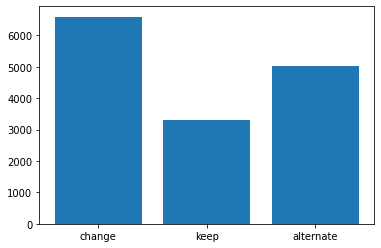

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def play_many_games(strategy, nb_turns):
  
  doors = np.array(['A', 'B', 'C'])

  correct_door = np.random.choice(doors, nb_turns)
  first_choice = np.random.choice(doors, nb_turns)
#we don't need to mention the hint_door because it will always be revealed anyway
#we win when we keep if we picked the correct door and we win when we change if we picked the wrong door

  if strategy == "alternate":
    var2 = np.random.choice(["keep","change"], nb_turns)
    #win variable check the variable var2: if "change" is found and the first_choice is not the correct_door, it adds 1 which is a win
    #then if "change" is not found it checks if first_choice is the correct_door, if yes, it adds 1
    win = np.sum(np.where(var2 == "change", first_choice != correct_door, first_choice == correct_door))
  elif strategy == "change":
      win = np.sum((correct_door != first_choice)) 
  elif strategy == "keep":
      win = np.sum((correct_door == first_choice))



  return win


plot = plt.bar([1, 2, 3],
               [play_many_games("change", 10000), play_many_games("keep", 10000), play_many_games("alternate", 10000)], 
               tick_label=["change", "keep", "alternate"])